## Cargando los datos

In [43]:
import pandas as pd

In [44]:
datos_a_priori = pd.read_csv("data/datos-compras.csv")
datos_a_priori

,Transaccion,Producto
0,1,Leche
1,1,Huevos
2,1,Pan
3,1,Mantequilla
4,2,Salchichas
5,2,Harina
6,2,Leche
7,2,Catsup
8,3,Mermerlada
9,3,Mantequilla


In [45]:
# Las transacciones deben ser numéricas y los productos factores
datos_a_priori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Transaccion  42 non-null     int64 
 1   Producto     42 non-null     object
dtypes: int64(1), object(1)
memory usage: 800.0+ bytes


## Formato de transacción a datos_a_priori

In [46]:
transacciones = datos_a_priori.groupby("Transaccion")["Producto"].apply(list).reset_index()
transacciones["Producto"] = transacciones["Producto"].apply(lambda x: ','.join(x))
transacciones

,Transaccion,Producto
0,1,"Leche,Huevos,Pan,Mantequilla"
1,2,"Salchichas,Harina,Leche,Catsup"
2,3,"Mermerlada,Mantequilla,Catsup,Salchichas"
3,4,"Pan,Leche,Mantequilla"
4,5,"Mantequilla,Pan,Galletas"
5,6,"Galletas,Pan,Mantequilla,Leche"
6,7,"Leche,Galletas"
7,8,"Pan,Leche,Mantequilla"
8,9,"Huevos,Pan,Mantequilla,Galletas"
9,10,"Leche,Mantequilla,Pan"


## Guardar los productos como CSV

In [47]:
transacciones.to_csv("output/lista-productos-p.csv", index=False, quotechar='"', quoting=0)

## Leer archivo con las transacciones 

In [48]:
transacciones = pd.read_csv("output/lista-productos-p.csv", sep=",", header=0)
print(transacciones)

    Transaccion                                  Producto
0             1              Leche,Huevos,Pan,Mantequilla
1             2            Salchichas,Harina,Leche,Catsup
2             3  Mermerlada,Mantequilla,Catsup,Salchichas
3             4                     Pan,Leche,Mantequilla
4             5                  Mantequilla,Pan,Galletas
5             6            Galletas,Pan,Mantequilla,Leche
6             7                            Leche,Galletas
7             8                     Pan,Leche,Mantequilla
8             9           Huevos,Pan,Mantequilla,Galletas
9            10                     Leche,Mantequilla,Pan
10           11                     Mantequilla,Pan,Leche
11           12            Leche,Atun,Pan,Galletas,Catsup


## Graficar los productos que se han vendido más

In [49]:
import matplotlib.pyplot as plt

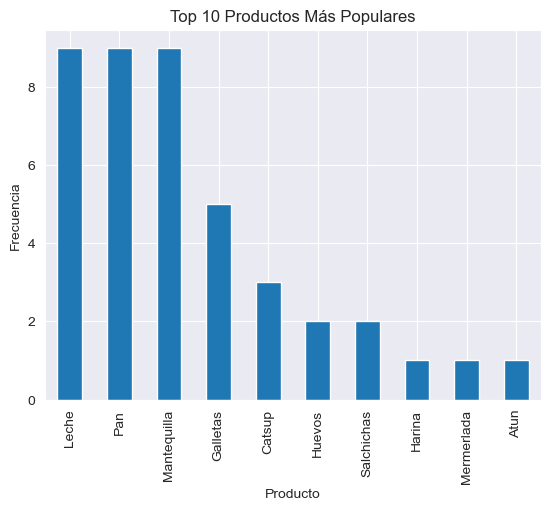

In [50]:
# Dividir las cadenas de productos y expandirlas en nuevas columnas
productos_divididos = transacciones['Producto'].str.split(',', expand=True)

# Apilar las columnas para obtener una sola columna de productos
productos_apilados = productos_divididos.stack()

# Contar la frecuencia de cada producto
productos_contados = productos_apilados.value_counts()

# Mostrar los 10 productos más populares
productos_contados.head(10).plot(kind='bar')
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.title('Top 10 Productos Más Populares')
plt.show()

# Reglas de asociación por medio del algoritmo apriori

In [51]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [52]:
# Crear un codificador one-hot
te = TransactionEncoder()
transacciones_encoded = te.fit(transacciones["Producto"].apply(lambda x: x.split(','))).transform(transacciones["Producto"].apply(lambda x: x.split(',')))

In [53]:
# Convertir la matriz generada por el codificador a un DataFrame
transacciones_encoded_df = pd.DataFrame(transacciones_encoded, columns=te.columns_)
transacciones_encoded_df

,Atun,Catsup,Galletas,Harina,Huevos,Leche,Mantequilla,Mermerlada,Pan,Salchichas
0,False,False,False,False,True,True,True,False,True,False
1,False,True,False,True,False,True,False,False,False,True
2,False,True,False,False,False,False,True,True,False,True
3,False,False,False,False,False,True,True,False,True,False
4,False,False,True,False,False,False,True,False,True,False
5,False,False,True,False,False,True,True,False,True,False
6,False,False,True,False,False,True,False,False,False,False
7,False,False,False,False,False,True,True,False,True,False
8,False,False,True,False,True,False,True,False,True,False
9,False,False,False,False,False,True,True,False,True,False


In [54]:
# Obtenemos las reglas de asociación por medio del algoritmo apriori
frequent_itemsets = apriori(transacciones_encoded_df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.250000,(Catsup)
1,0.416667,(Galletas)
2,0.166667,(Huevos)
3,0.750000,(Leche)
4,0.750000,(Mantequilla)
5,0.750000,(Pan)
6,0.166667,(Salchichas)
7,0.166667,"(Leche, Catsup)"
8,0.166667,"(Salchichas, Catsup)"
9,0.250000,"(Leche, Galletas)"


In [55]:
# Generamos reglas de asociación
reglas = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
reglas = reglas.sort_values(by="confidence", ascending=False)
reglas

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Salchichas),(Catsup),0.166667,0.250000,0.166667,1.000000,4.000000,0.125000,inf,0.900000
2,(Huevos),(Mantequilla),0.166667,0.750000,0.166667,1.000000,1.333333,0.041667,inf,0.300000
3,(Huevos),(Pan),0.166667,0.750000,0.166667,1.000000,1.333333,0.041667,inf,0.300000
9,"(Galletas, Mantequilla)",(Pan),0.250000,0.750000,0.250000,1.000000,1.333333,0.062500,inf,0.333333
10,"(Pan, Huevos)",(Mantequilla),0.166667,0.750000,0.166667,1.000000,1.333333,0.041667,inf,0.300000
11,"(Huevos, Mantequilla)",(Pan),0.166667,0.750000,0.166667,1.000000,1.333333,0.041667,inf,0.300000
12,(Huevos),"(Pan, Mantequilla)",0.166667,0.666667,0.166667,1.000000,1.500000,0.055556,inf,0.400000
14,"(Leche, Mantequilla)",(Pan),0.500000,0.750000,0.500000,1.000000,1.333333,0.125000,inf,0.500000
6,(Pan),(Mantequilla),0.750000,0.750000,0.666667,0.888889,1.185185,0.104167,2.250,0.625000
7,(Mantequilla),(Pan),0.750000,0.750000,0.666667,0.888889,1.185185,0.104167,2.250,0.625000


In [56]:
# Viendo la estructura del objeto reglas
print(reglas.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         16 non-null     object 
 1   consequents         16 non-null     object 
 2   antecedent support  16 non-null     float64
 3   consequent support  16 non-null     float64
 4   support             16 non-null     float64
 5   confidence          16 non-null     float64
 6   lift                16 non-null     float64
 7   leverage            16 non-null     float64
 8   conviction          16 non-null     float64
 9   zhangs_metric       16 non-null     float64
dtypes: float64(8), object(2)
memory usage: 1.4+ KB
None


In [57]:
# Revisamos si hay reglas duplicadas
print(reglas.duplicated())

0     False
2     False
3     False
9     False
10    False
11    False
12    False
14    False
6     False
7     False
13    False
1     False
4     False
5     False
8     False
15    False
dtype: bool


In [58]:
# Verificamos si hay reglas redundantes
redundantes = reglas.duplicated(subset=['antecedents', 'consequents'])
print(redundantes)

0     False
2     False
3     False
9     False
10    False
11    False
12    False
14    False
6     False
7     False
13    False
1     False
4     False
5     False
8     False
15    False
dtype: bool


In [59]:
reglas_podadas = reglas[~redundantes]
reglas_podadas

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Salchichas),(Catsup),0.166667,0.250000,0.166667,1.000000,4.000000,0.125000,inf,0.900000
2,(Huevos),(Mantequilla),0.166667,0.750000,0.166667,1.000000,1.333333,0.041667,inf,0.300000
3,(Huevos),(Pan),0.166667,0.750000,0.166667,1.000000,1.333333,0.041667,inf,0.300000
9,"(Galletas, Mantequilla)",(Pan),0.250000,0.750000,0.250000,1.000000,1.333333,0.062500,inf,0.333333
10,"(Pan, Huevos)",(Mantequilla),0.166667,0.750000,0.166667,1.000000,1.333333,0.041667,inf,0.300000
11,"(Huevos, Mantequilla)",(Pan),0.166667,0.750000,0.166667,1.000000,1.333333,0.041667,inf,0.300000
12,(Huevos),"(Pan, Mantequilla)",0.166667,0.666667,0.166667,1.000000,1.500000,0.055556,inf,0.400000
14,"(Leche, Mantequilla)",(Pan),0.500000,0.750000,0.500000,1.000000,1.333333,0.125000,inf,0.500000
6,(Pan),(Mantequilla),0.750000,0.750000,0.666667,0.888889,1.185185,0.104167,2.250,0.625000
7,(Mantequilla),(Pan),0.750000,0.750000,0.666667,0.888889,1.185185,0.104167,2.250,0.625000


In [60]:
import networkx as nx

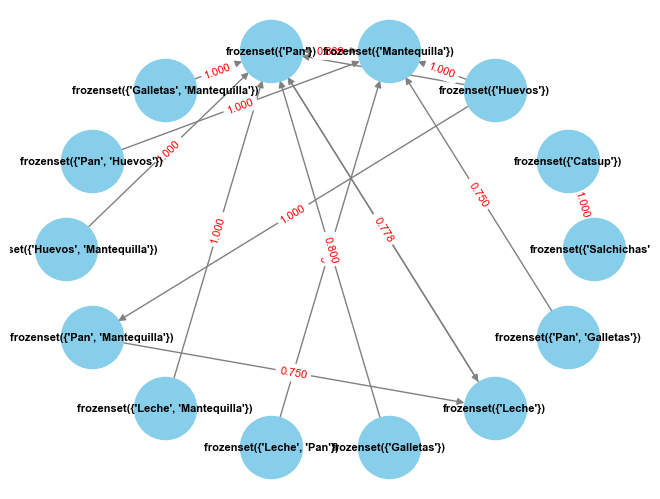

In [61]:
# Creamos un grafo con las reglas
G = nx.DiGraph()
for i, row in reglas.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['confidence'])

# Visualizamos el grafo con layout circular
pos = nx.circular_layout(G)

# Redondeamos los valores de confianza a 3 decimales
edge_labels = {edge: f"{weight:.3f}" for edge, weight in nx.get_edge_attributes(G, 'weight').items()}

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2000, node_color="skyblue", font_size=8, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
plt.show()

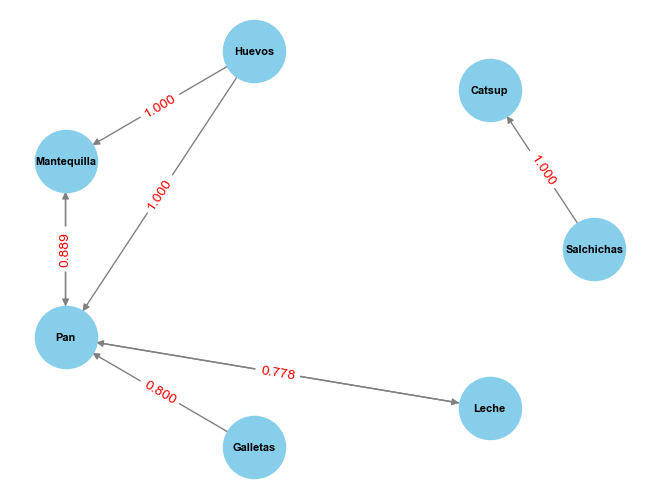

In [62]:
# Filtramos el DataFrame para incluir solo registros con un solo antecedente y un solo consecuente
filtered_reglas = reglas[(reglas['antecedents'].apply(lambda x: len(x) == 1)) & (reglas['consequents'].apply(lambda x: len(x) == 1))]

# Creamos un grafo con las reglas filtradas
G = nx.DiGraph()
for i, row in filtered_reglas.iterrows():
    antecedent, = row['antecedents']  # Extraemos el único elemento del antecedente
    consequent, = row['consequents']  # Extraemos el único elemento del consecuente
    G.add_edge(antecedent, consequent, weight=row['confidence'])

# Visualizamos el grafo con layout circular
pos = nx.circular_layout(G)

# Redondeamos los valores de confianza a 3 decimales
edge_labels = {(edge[0], edge[1]): f"{weight:.3f}" for edge, weight in nx.get_edge_attributes(G, 'weight').items()}

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2000, node_color="skyblue", font_size=8, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)
plt.show()